# Spotify EDA <br>
https://www.kaggle.com/yamaerenay/spotify-datase <br><br>
1. 음악의 특징들간 상관관계 <br>
2. 장르별 음악의 특징 분포 <br>
3. 시간대에 따른 음악 변천사 분석 (큼직한 아티스트들 insight) <br> 
4. 스포티파이 내 popularity

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [1]:
# tracks 데이터 불러오기
df = pd.read_csv('./datascience/spotify/data/tracks.csv')
df

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
# 필요없는 컬럼 제거
df.drop(['explicit','id','id_artists','time_signature'],axis=1,inplace=True)
df.head()

,name,popularity,duration_ms,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,126903,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,Lady of the Evening,0,163080,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [ ]:
# ms를 second(int)로 변환 (열 추가)
df['duration_sec'] = (df["duration_ms"]/1000).round()
df['duration_sec'] = df["duration_sec"].astype('int64')
df.drop(['duration_ms'],axis=1,inplace=True)
df['duration_sec']

0         127
1          98
2         182
3         177
4         163
         ... 
586667    258
586668    153
586669    188
586670    142
586671    214
Name: duration_sec, Length: 586672, dtype: int64

In [ ]:
# 년도만 출력
df['release_date'] = df['release_date'].astype('str')
df['release_date'] = df['release_date'].str[:4]

In [ ]:
# 발매일 datetime 변환
df['release_date'] = pd.to_datetime(df['release_date'], format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              586601 non-null  object        
 1   popularity        586672 non-null  int64         
 2   artists           586672 non-null  object        
 3   release_date      586672 non-null  datetime64[ns]
 4   danceability      586672 non-null  float64       
 5   energy            586672 non-null  float64       
 6   key               586672 non-null  int64         
 7   loudness          586672 non-null  float64       
 8   mode              586672 non-null  int64         
 9   speechiness       586672 non-null  float64       
 10  acousticness      586672 non-null  float64       
 11  instrumentalness  586672 non-null  float64       
 12  liveness          586672 non-null  float64       
 13  valence           586672 non-null  float64       
 14  temp

<Figure size 1440x720 with 0 Axes>

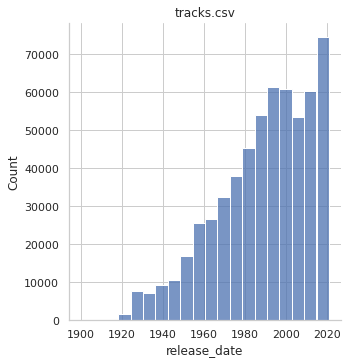

In [ ]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['release_date'],bins=20)
ax.set(title ="tracks.csv")
plt.savefig('year_count.png', dpi = 300)

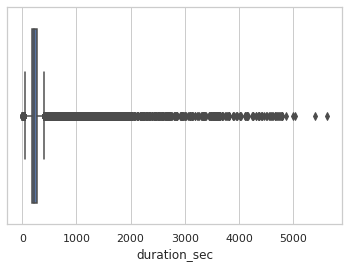

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["duration_sec"])

<Figure size 1440x720 with 0 Axes>

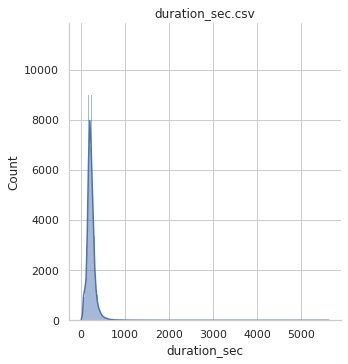

In [ ]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['duration_sec'], kde=True)
ax.set(title ="duration_sec.csv")
plt.savefig('year_count.png', dpi = 300)

In [ ]:
df['duration_sec'].mean()

230.05065181225626

In [ ]:
# key, mode 분리
df_category = df[['key','mode']]
df_category

,key,mode
0,0,1
1,0,1
2,1,1
3,7,1
4,3,0
...,...,...
586667,0,0
586668,0,1
586669,7,0
586670,10,1


In [ ]:
# key, mode 삭제 
df.drop(['key','mode'],axis=1,inplace=True)

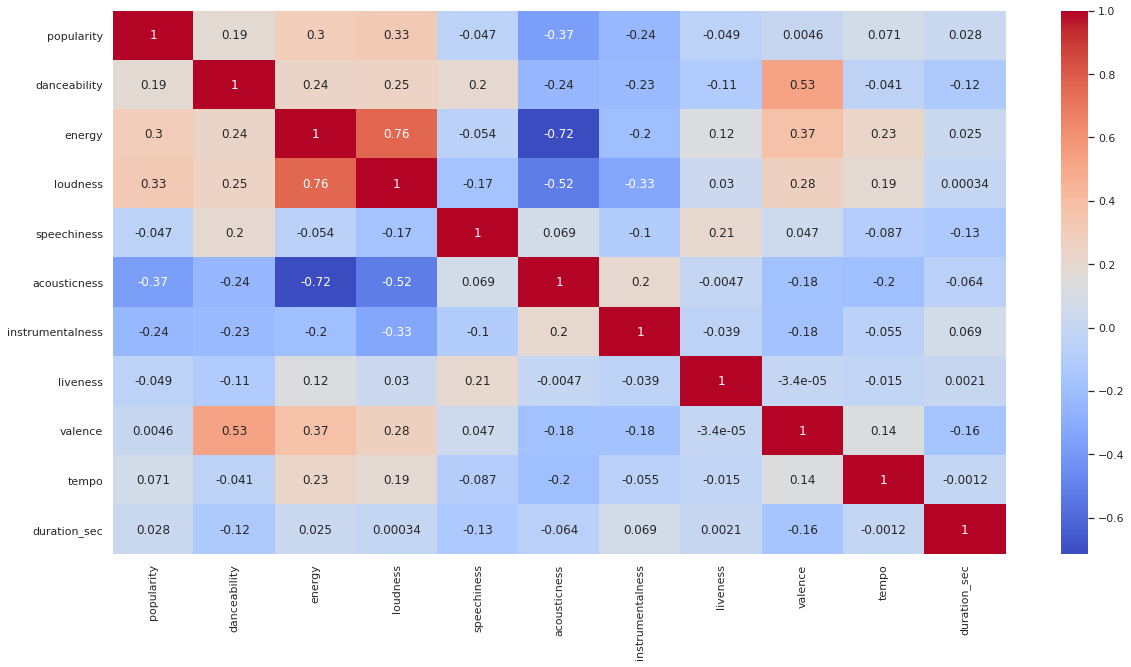

In [ ]:
# feature correlation (heatmap)
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('feature_heatmap.png', dpi = 400)

In [ ]:
# key sum값
key = df_category['key'].value_counts()
key

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [ ]:
# mode sum값
mode = df_category['mode'].value_counts()
mode

1    386498
0    200174
Name: mode, dtype: int64

In [ ]:
# key, mode 파이차트
key_mapping = {0:"C",1:"C♯",2:"D",3:"D♯",4:"E",5:"F",6:"F♯",7:"G",8:"G♯",9:"A",10:"A♯",11:"B"}
key_counts_df = pd.DataFrame(df_category["key"].value_counts())
key_counts_df['key_names'] = key_counts_df.index.to_series().map(key_mapping)

key_labels = key_counts_df['key_names'].values
key_values = key_counts_df['key'].values

mode_mapping = {0:"Minor",1:"Major"}
mode_counts_df = pd.DataFrame(df_category["mode"].value_counts())
mode_counts_df['mode_names'] = mode_counts_df.index.to_series().map(mode_mapping)

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['mode'].values

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=key_labels, values=key_values),row=1, col=1)

fig.add_trace(
    go.Pie(labels=mode_labels, values=mode_values),row=1, col=2)

fig.update_traces(textinfo='percent+label')


fig.update_layout(height=600, width=1200, title="Keys / Modes")
fig.show()

AttributeError: ignored

<Figure size 1152x576 with 0 Axes>

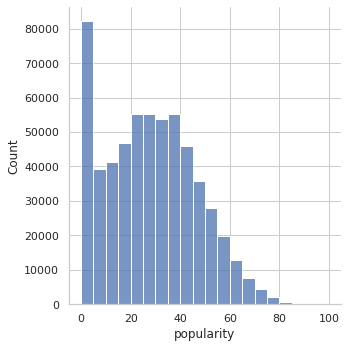

In [ ]:
plt.figure(figsize=(16, 8))
sns.displot(df.popularity,bins=20)
ax.set_title('popularity_density')
plt.savefig('popularity_count.png', dpi = 400)

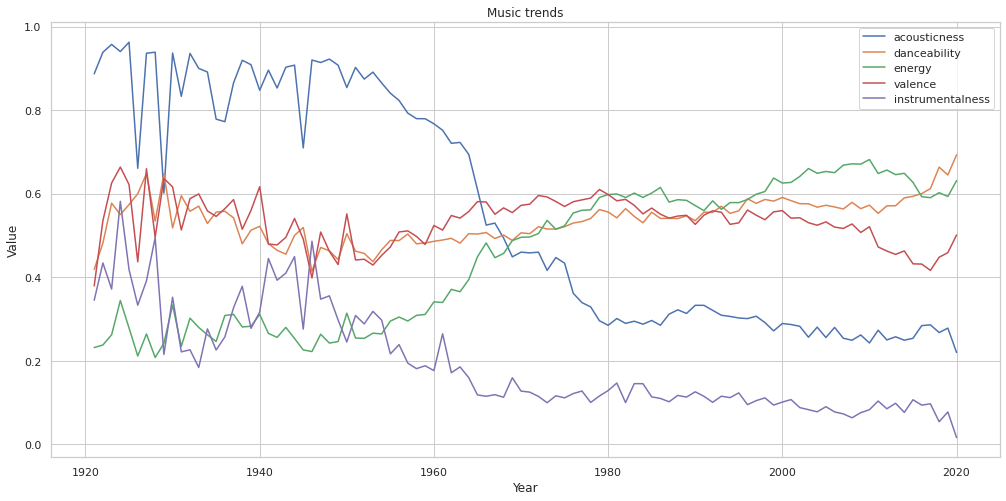

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","valence", "instrumentalness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends.png', dpi = 400)

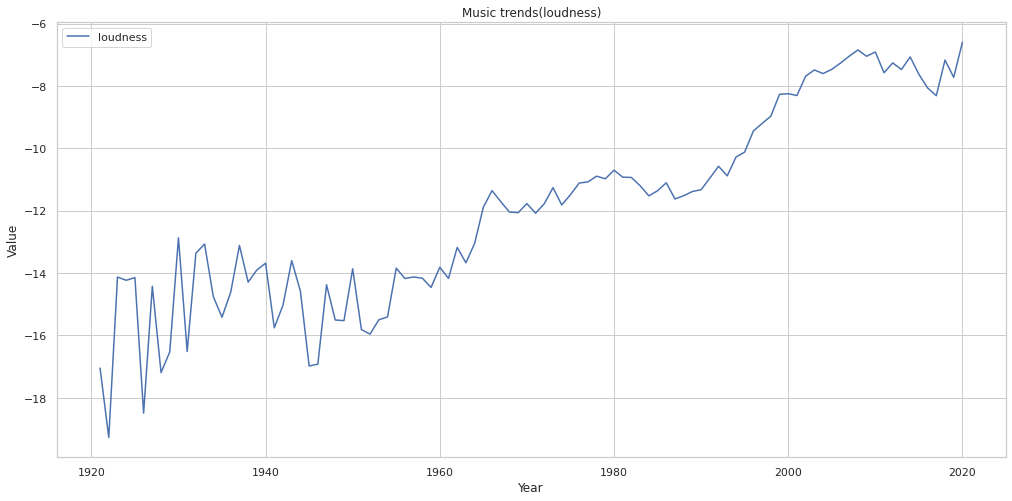

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(loudness)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(loudness).png', dpi = 400)

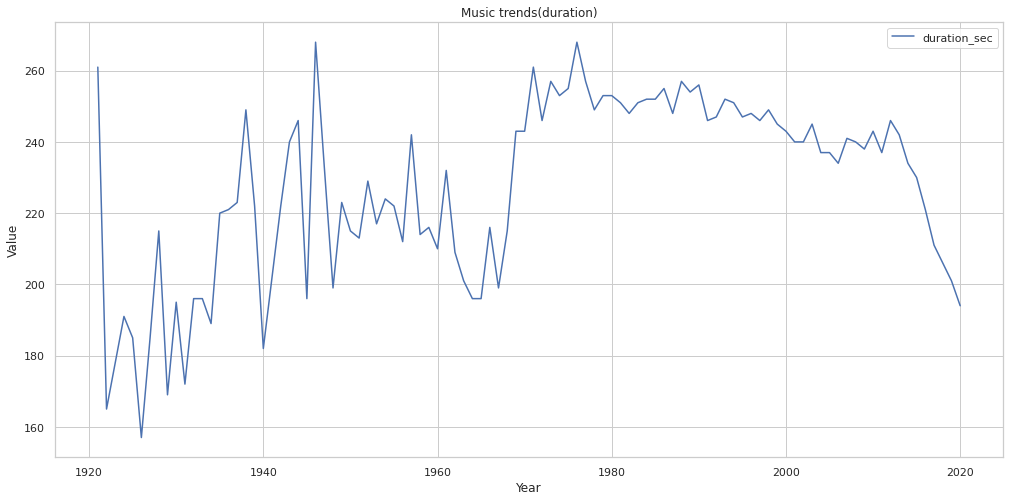

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

# ms를 second(int)로 변환 (열 추가)
df_year['duration_sec'] = (df_year["duration_ms"]/1000).round()
df_year['duration_sec'] = df_year["duration_sec"].astype('int64')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["duration_sec"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(duration)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(duration).png', dpi = 400)

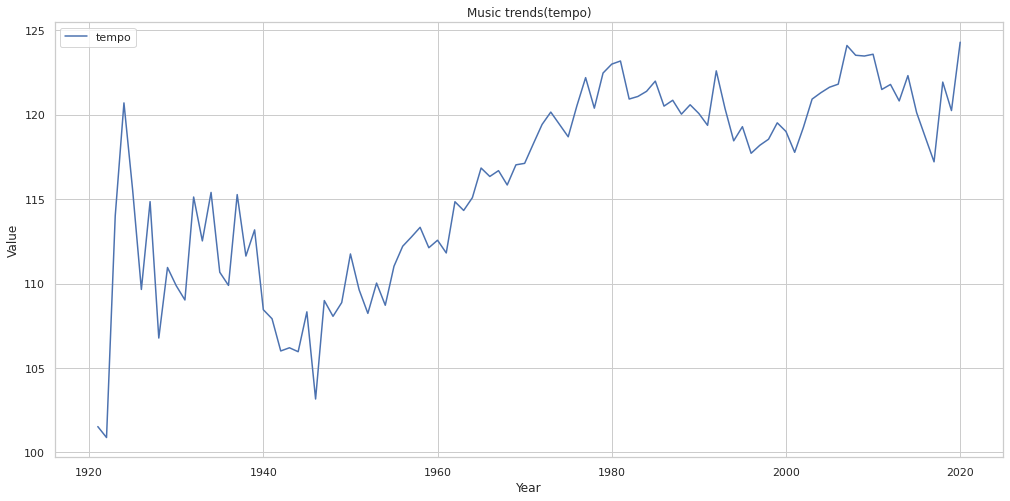

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(tempo)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(tempo).png', dpi = 400)

In [ ]:
df_genre = pd.read_csv('./drive/MyDrive/spotify/data/data_by_genres_o.csv')
df_genre.drop(['key','mode', 'duration_ms', 'liveness', 'speechiness'],axis=1,inplace=True)
df_genre

,genres,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,0.071317,0.606834,-31.514333,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,0.450678,0.477762,-16.854000,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,0.818000,0.876000,-9.180000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,0.419146,0.205309,-12.288965,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,0.316434,0.003003,-12.479387,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...
2968,zolo,0.222625,0.547082,0.610240,0.143872,-11.295878,125.494919,0.596155,33.778943
2969,zouglou,0.161000,0.863000,0.909000,0.000000,-5.985000,119.038000,0.845000,58.000000
2970,zouk,0.263261,0.748889,0.622444,0.257227,-10.289222,101.965222,0.824111,46.666667
2971,zurich indie,0.993000,0.705667,0.172667,0.468633,-11.453333,91.278000,0.739000,0.000000


In [ ]:
pop = df_genre[df_genre['genres'].str.contains('pop')]
pop.mean()

acousticness          0.363566
danceability          0.587740
energy                0.591264
instrumentalness      0.092689
loudness             -8.666738
tempo               120.562793
valence               0.541915
popularity           45.503919
dtype: float64

In [ ]:
rock = df_genre[df_genre['genres'].str.contains('rock')]
rock.mean()

acousticness          0.250290
danceability          0.521813
energy                0.673950
instrumentalness      0.147123
loudness             -8.377117
tempo               125.050473
valence               0.542509
popularity           42.405265
dtype: float64

In [ ]:
metal = df_genre[df_genre['genres'].str.contains('metal')]
metal.mean()

acousticness          0.037390
danceability          0.383990
energy                0.861251
instrumentalness      0.255065
loudness             -6.473310
tempo               128.271660
valence               0.331130
popularity           43.648635
dtype: float64

In [ ]:
jazz = df_genre[df_genre['genres'].str.contains('jazz')]
jazz.mean()

acousticness          0.628271
danceability          0.529772
energy                0.389689
instrumentalness      0.391621
loudness            -14.144869
tempo               113.289652
valence               0.502553
popularity           32.662257
dtype: float64

In [ ]:
hiphop = df_genre[df_genre['genres'].str.contains('hip')]
hiphop.mean()

acousticness          0.252475
danceability          0.663802
energy                0.650354
instrumentalness      0.043278
loudness             -7.382390
tempo               116.465270
valence               0.554601
popularity           48.990553
dtype: float64

In [ ]:
classical = df_genre[df_genre['genres'].str.contains('classical')]
classical.mean()

acousticness          0.902761
danceability          0.325826
energy                0.159784
instrumentalness      0.619784
loudness            -22.448363
tempo               103.062530
valence               0.235408
popularity           27.924763
dtype: float64

In [ ]:
k_pop = df_genre[df_genre['genres'].str.contains('k-pop')]
k_pop.mean()

acousticness          0.211184
danceability          0.654756
energy                0.712394
instrumentalness      0.018317
loudness             -5.304191
tempo               119.793920
valence               0.563548
popularity           60.874437
dtype: float64

In [ ]:
genres_clear = pd.DataFrame({'pop' : rock.mean(), 'jazz' : jazz.mean(), 'classical' : classical.mean(), 'rock' : rock.mean(), 'hiphop' : hiphop.mean(), 'k-pop' : k_pop.mean()})
genres_clear = genres_clear.T
genres_clear

,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
pop,0.250290,0.521813,0.673950,0.147123,-8.377117,125.050473,0.542509,42.405265
jazz,0.628271,0.529772,0.389689,0.391621,-14.144869,113.289652,0.502553,32.662257
classical,0.902761,0.325826,0.159784,0.619784,-22.448363,103.062530,0.235408,27.924763
rock,0.250290,0.521813,0.673950,0.147123,-8.377117,125.050473,0.542509,42.405265
hiphop,0.252475,0.663802,0.650354,0.043278,-7.382390,116.465270,0.554601,48.990553
k-pop,0.211184,0.654756,0.712394,0.018317,-5.304191,119.793920,0.563548,60.874437


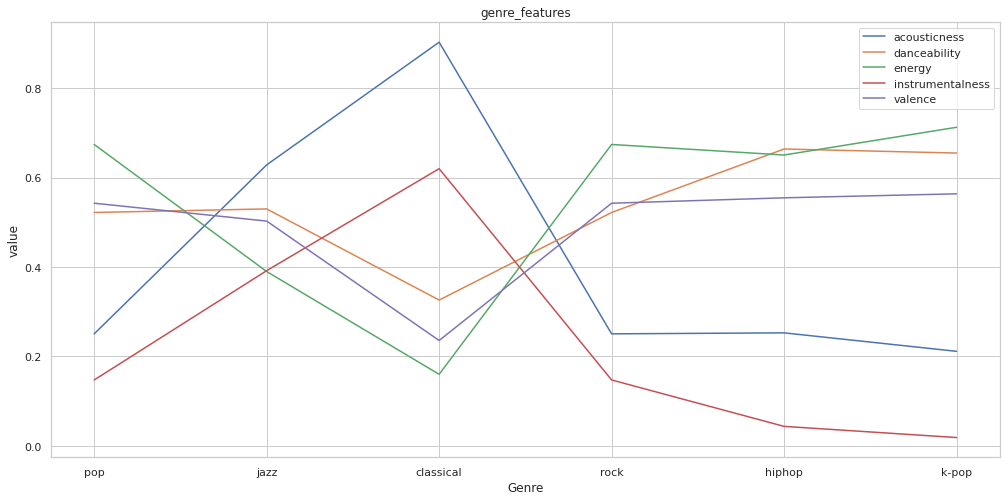

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres1.png', dpi = 400)

Text(0.5, 0, 'Genre')

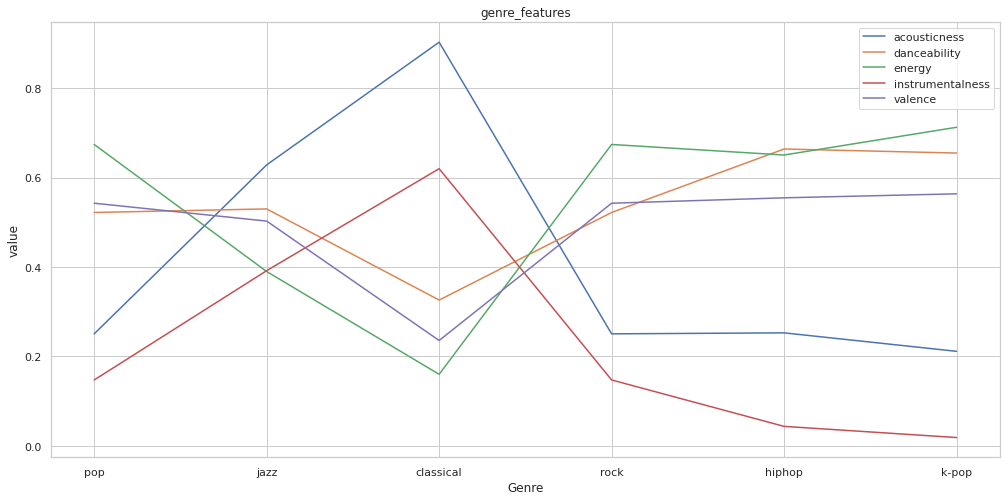

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

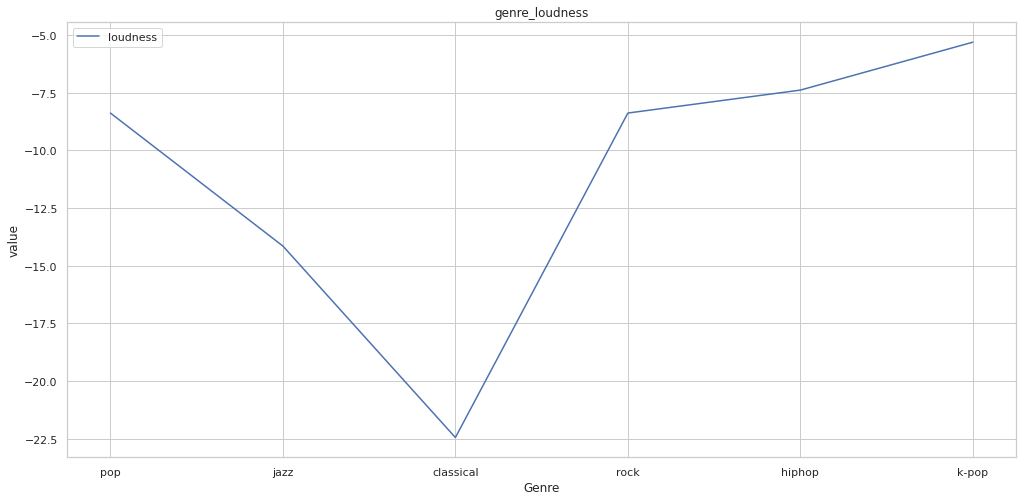

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['loudness']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_loudness')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres2.png', dpi = 400)

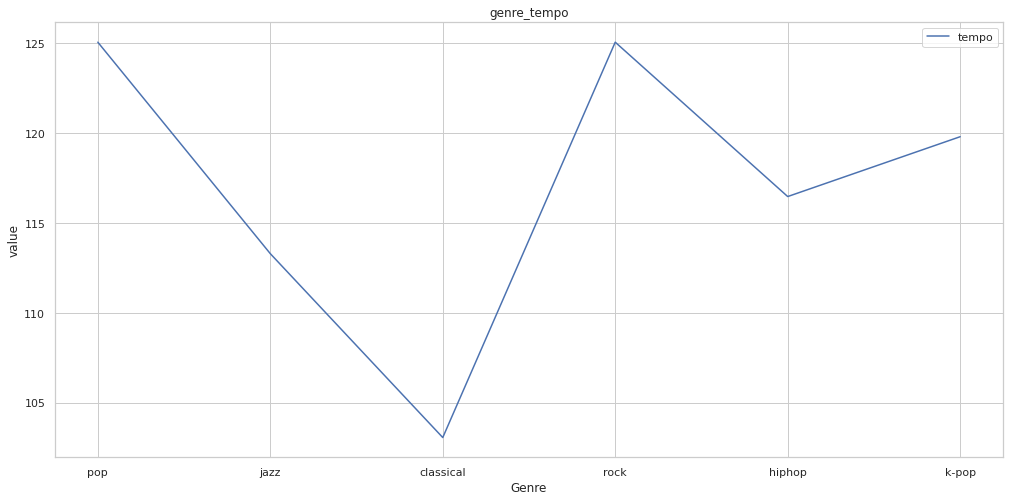

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['tempo']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_tempo')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres3.png', dpi = 400)

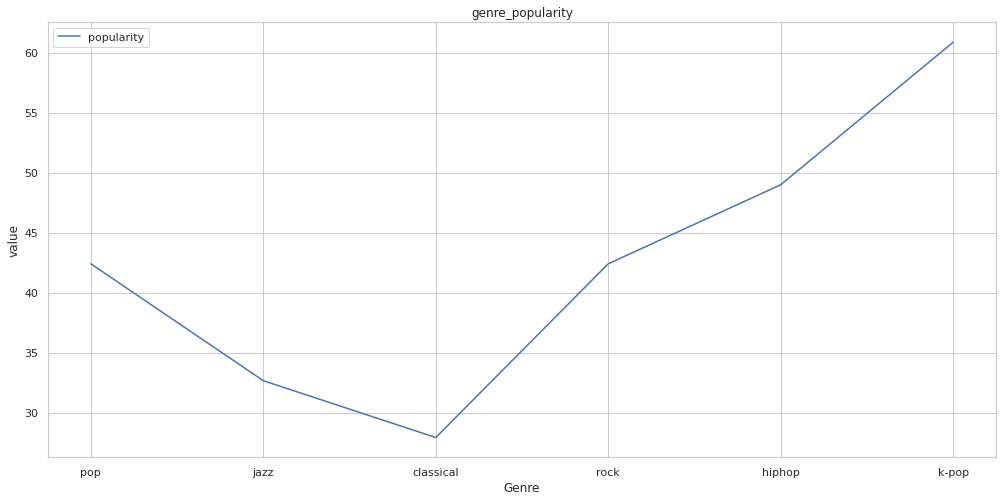

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['popularity']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_popularity')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres4.png', dpi = 400)

In [ ]:
df_artist = pd.read_csv('./drive/MyDrive/spotify/data/data_by_artist_o.csv')
df_artist["artists"] = df_artist["artists"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_artist
# 너무 오래걸림ㅠ

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],Cats1981OriginalLondonCast,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],Cats1983BroadwayCast,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],FiddlerOnTheRoofMotionPictureChorus,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],FiddlerOnTheRoofMotionPictureOrchestra,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],JosephAndTheAmazingTechnicolorDreamcoat1991Lon...,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [ ]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

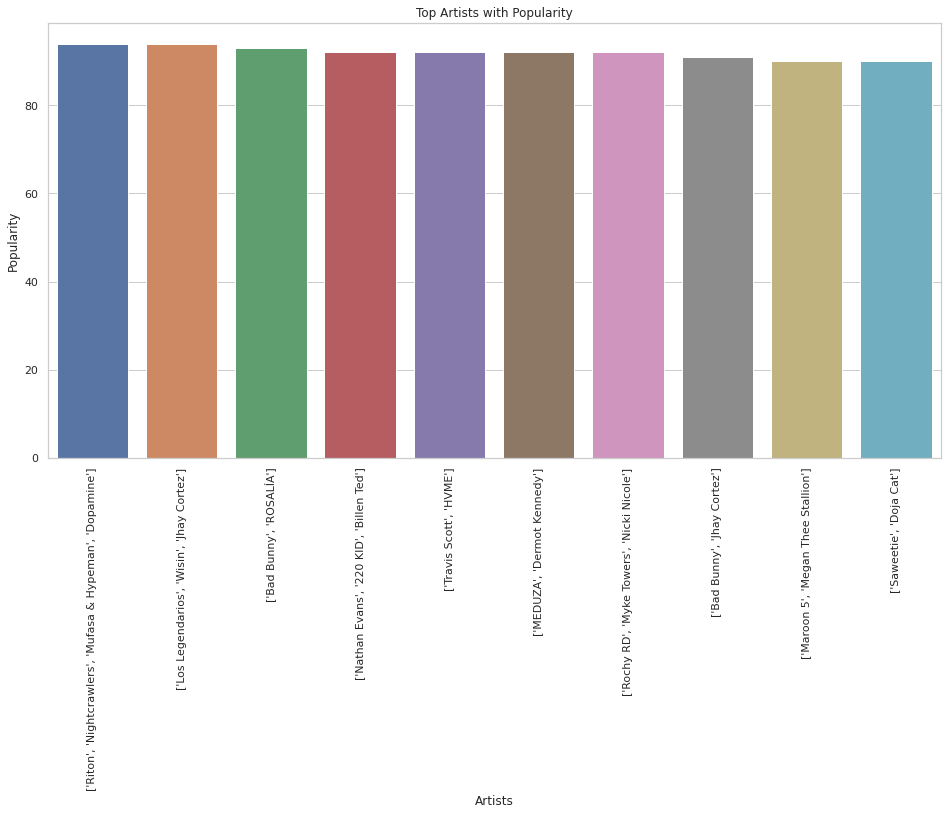

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

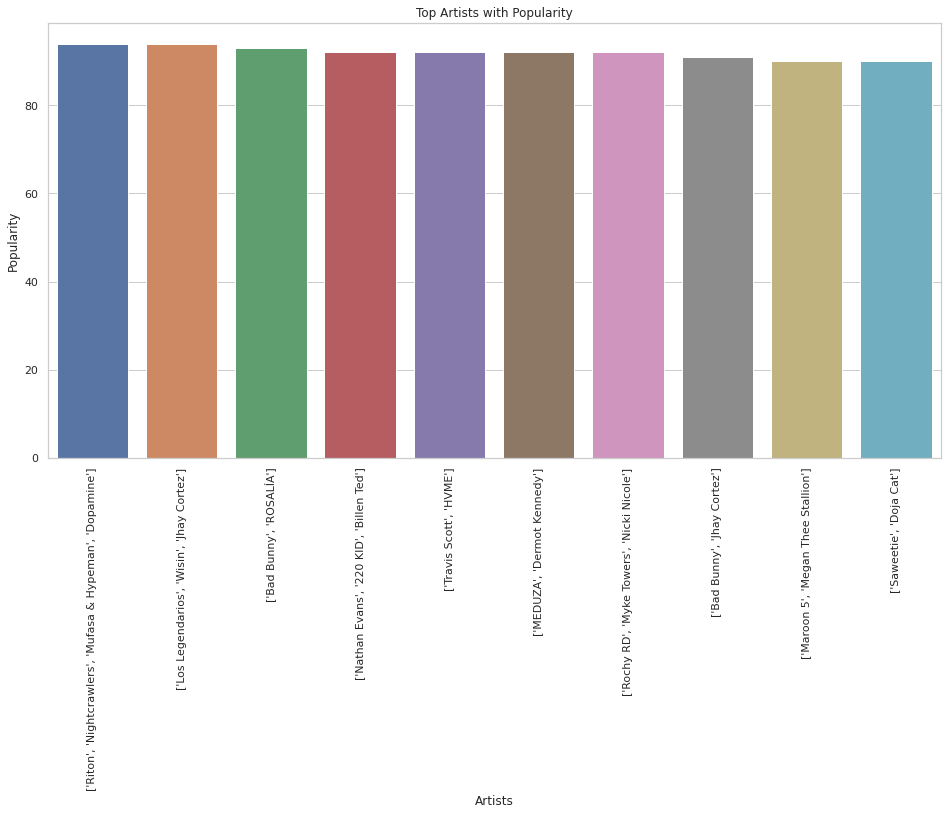

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

In [ ]:
df_artist = pd.read_csv('./drive/MyDrive/spotify/data/data_by_artist_o.csv')
df_artist

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [ ]:
BTS = df_artist[df_artist['artists'] == 'BTS']
BTS.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
1971,"['k-pop', 'k-pop boy group']",BTS,0.117036,0.619079,228262.290323,0.768387,0.000059,0.204243,-4.644143,0.130704,124.428183,0.528895,68.448029,1,0,279


In [ ]:
Beatles = df_artist[df_artist['artists'] == 'The Beatles']
Beatles.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
24346,"['beatlesque', 'british invasion', 'classic ro...",The Beatles,0.359534,0.522404,174591.257038,0.546576,0.052255,0.221973,-9.687188,0.053337,121.252759,0.619537,47.203182,0,1,817


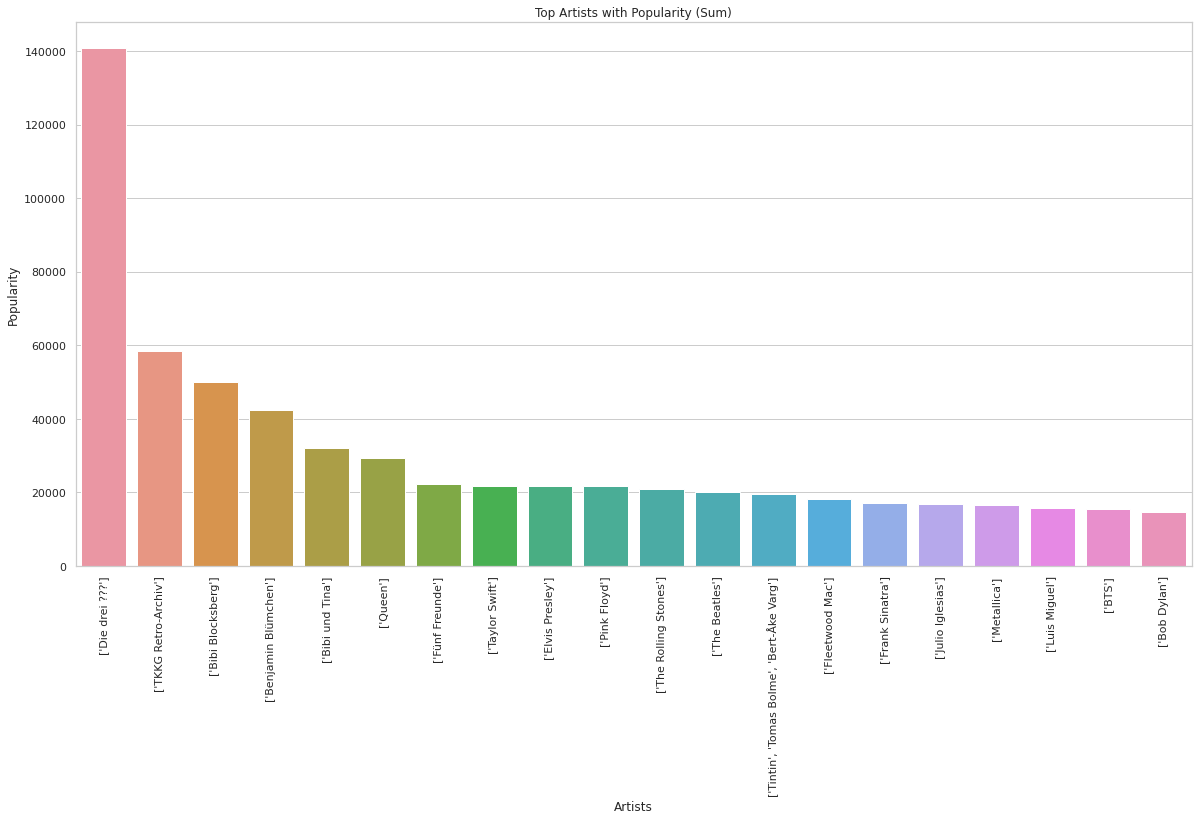

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity (Sum)')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 500)

# feature engineering
- for popularity

In [ ]:
df.head()

,name,popularity,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922-01-01,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922-01-01,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922-01-01,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922-01-01,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922-01-01,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,163


In [ ]:
# 년도만 출력
df['release_date'] = df['release_date'].astype('str')
df['release_date'] = df['release_date'].str[:4]
df['release_date'] = df['release_date'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586672 non-null  int64  
 2   artists           586672 non-null  object 
 3   release_date      586672 non-null  int64  
 4   danceability      586672 non-null  float64
 5   energy            586672 non-null  float64
 6   key               586672 non-null  int64  
 7   loudness          586672 non-null  float64
 8   mode              586672 non-null  int64  
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
 15  duration_sec      586672 non-null  int64  
dtypes: float64(9), int64

In [ ]:
df.head()

,name,popularity,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163


In [ ]:
df.rename(columns={'release_date': 'year'}, inplace=True)
df.head()

,name,popularity,artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163


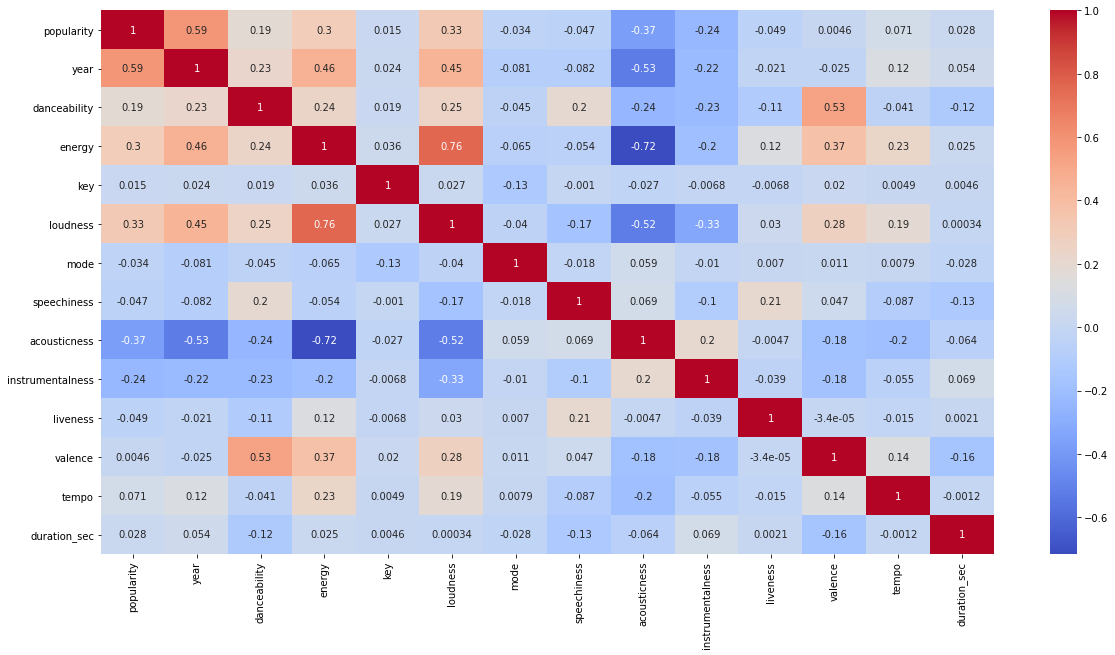

In [ ]:
# feature correlation (heatmap)
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('feature_heatmap.png', dpi = 400)

MinMax Scaling

In [ ]:
# 곡 이름, 가수 제거
df_features = df.sort_values(by='year').drop(columns=['name', 'artists']).copy()

In [ ]:
X = df_features.drop('popularity', axis=1).copy()
y = df_features['popularity'].copy()

In [ ]:
X

,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
478627,1900,0.659,0.791,-4.895,0.0295,0.1390,0.000002,0.1610,0.956,141.999,234
132350,1922,0.567,0.663,-5.334,0.0318,0.9920,0.878000,0.2680,0.853,103.394,233
132349,1922,0.483,0.060,-9.499,0.0420,0.9820,0.000089,0.0498,0.381,136.044,196
132348,1922,0.578,0.462,-7.217,0.0398,0.9950,0.903000,0.0767,0.513,89.876,195
132347,1922,0.565,0.334,-6.802,0.0309,0.9780,0.032900,0.2560,0.550,97.167,190
...,...,...,...,...,...,...,...,...,...,...,...
211946,2021,0.777,0.714,-4.296,0.0532,0.1600,0.000000,0.1150,0.590,90.987,237
211945,2021,0.804,0.786,-3.837,0.0735,0.1440,0.000000,0.0928,0.575,91.992,309
211944,2021,0.807,0.606,-8.871,0.0872,0.0946,0.000000,0.1190,0.304,92.988,228
211955,2021,0.855,0.710,-5.321,0.0939,0.0426,0.000000,0.3370,0.591,89.977,247


In [ ]:
y

478627    19
132350     0
132349     0
132348     0
132347     0
          ..
211946     1
211945     0
211944     0
211955     1
444564    71
Name: popularity, Length: 586672, dtype: int64

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.66498486, 0.791     , ..., 0.956     , 0.57633908,
        0.04111784],
       [0.18181818, 0.57214934, 0.663     , ..., 0.853     , 0.41965087,
        0.04093984],
       [0.18181818, 0.48738648, 0.06      , ..., 0.381     , 0.5521692 ,
        0.03435386],
       ...,
       [1.        , 0.81432896, 0.606     , ..., 0.304     , 0.37741547,
        0.04004984],
       [1.        , 0.86276488, 0.71      , ..., 0.591     , 0.36519456,
        0.04343183],
       [1.        , 0.90413724, 0.459     , ..., 0.484     , 0.51115549,
        0.02954788]])

train / test set 구분

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=7)

1. Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성 후 학습시키기
lr = LinearRegression().fit(X_train, y_train)

y_predict = lr.predict(X_test)
y_predict

array([33.58494277, 14.02163809, 39.79344154, ..., 39.53671995,
       26.7270902 , 20.58665951])

In [ ]:
r_square = lr.score(X_test, y_test)
r_square

0.3690726521948443

In [ ]:
print("훈련 세트 정확도 : {:.2f}%".format(lr.score(X_train,y_train)*100))
print("테스트 세트 정확도 : {:.2f}%".format(lr.score(X_test,y_test)*100))

훈련 세트 정확도 : 36.86%
테스트 세트 정확도 : 36.91%


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

212.31744971376108
11.218320171193545


2. Lasso Regression

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import Lasso

# 다항 회귀분석 모형 객체 생성 후 학습 시키기
lasso001 = Lasso(alpha=0.01).fit(X_train,y_train)

y_predict = lasso001.predict(X_test)
y_predict

array([33.46222289, 13.83175935, 39.63965107, ..., 39.30743291,
       26.58780802, 21.08894164])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

212.41550594091285
11.21987954044766


In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
# -> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square = lasso001.score(X_test,y_test)
r_square

0.3688372476847972

In [ ]:
print("훈련 세트 정확도 : {:.2f}%".format(lasso001.score(X_train,y_train)*100))
print("테스트 세트 정확도 : {:.2f}%".format(lasso001.score(X_test,y_test)*100))

훈련 세트 정확도 : 36.89%
테스트 세트 정확도 : 36.88%


3. Ridge Regression

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import Ridge

# 다항 회귀분석 모형 객체 생성 후 학습 시키기
ridge50 = Ridge(alpha=5.0).fit(X_train,y_train)
y_predict = ridge50.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

212.31676022470262
11.218795024444313


In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
# -> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square = ridge50.score(X_test,y_test)
r_square

0.36907470109616436

4. Decision Tree

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# train 데이터를 가지고 모델 학습
tree_model.fit(X_train, y_train)

# test 데이터를 가지고 모델 예측
y_predict = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

449.6531743957455
14.318030476926399


In [ ]:
print(f"train set 정확도 : {tree_model.score(X_train, y_train)*100:.2f}")
print(f"test set 정확도 : {tree_model.score(X_test, y_test)*100:.2f}")

train set 정확도 : 9.36
test set 정확도 : 9.50


In [ ]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 max_depth 를 적용
max_depth_settings = range(1, 11)

for max_depth in max_depth_settings:
    # 모델 생성
    tr = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tr.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tr.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tr.score(X_test, y_test))

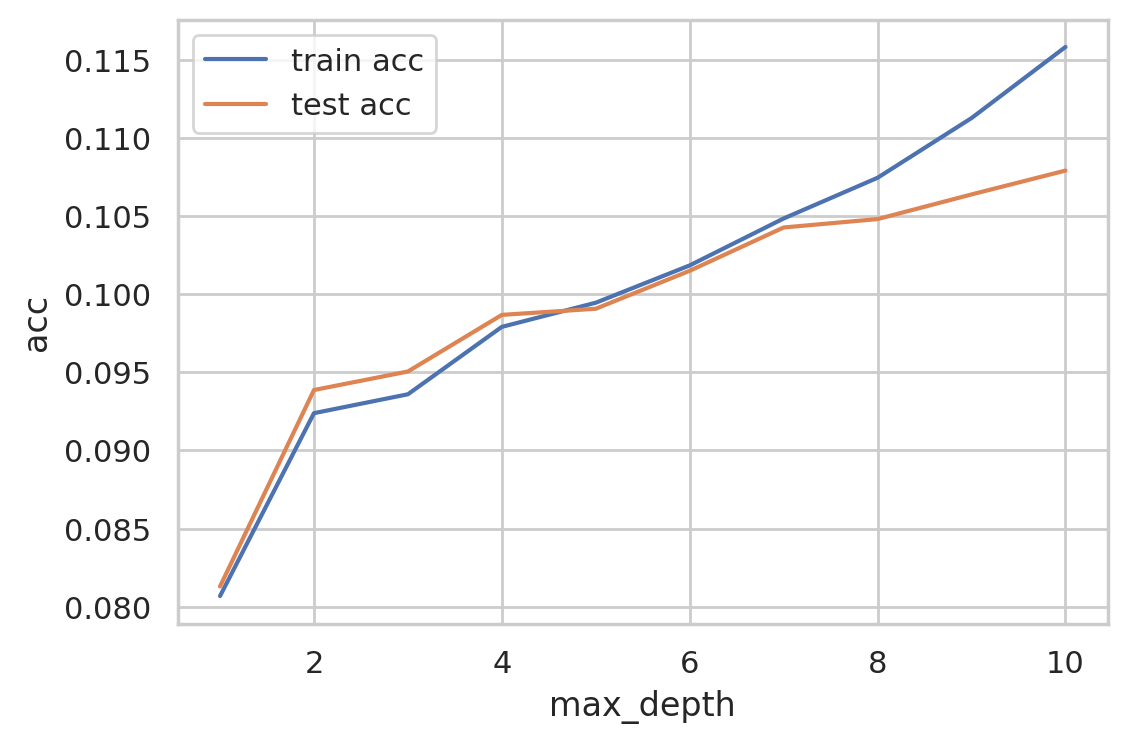

In [ ]:
plt.figure(dpi = 200)

plt.plot(max_depth_settings, training_accuracy, label="train acc")
plt.plot(max_depth_settings, test_accuracy, label="test acc")
plt.ylabel("acc")
plt.xlabel("max_depth")
plt.legend()
plt.show()

5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=5,
                                   random_state=0).fit(X_train,y_train)

In [ ]:
random.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

449.6531743957455
14.318030476926399


In [ ]:
# 정확도 확인
print('Train data Score : ', random.score(X_train, y_train))
print('Test data Score : ', random.score(X_test, y_test))

r_square = random.score(X_test,y_test)
r_square

Train data Score :  0.8692437518610054
Test data Score :  0.4027505686236398


0.4027505686236398

6. Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=777)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

184.70659240491625
10.333771548256916


7. Linear (nn)

In [ ]:
# train / validation 데이터를 6:3 비율로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.33,
                                                  random_state=777)

In [ ]:
print(X_train.shape, X_val.shape)

(275148, 13) (135522, 13)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 하나의 값을 출력 -> population

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [ ]:
# 모델 학습하기
history = model.fit(X_train,y_train,
                    epochs = 100,
                    validation_data = (X_val, y_val))

Epoch 1/100
8599/8599 [==============================] - 26s 3ms/step - loss: 221.1267 - mae: 11.4686 - mse: 221.1267 - val_loss: 203.9386 - val_mae: 10.9820 - val_mse: 203.9386
Epoch 2/100
8599/8599 [==============================] - 22s 3ms/step - loss: 203.9659 - mae: 10.9879 - mse: 203.9659 - val_loss: 203.5592 - val_mae: 10.9211 - val_mse: 203.5592
Epoch 3/100
8599/8599 [==============================] - 23s 3ms/step - loss: 200.9703 - mae: 10.8950 - mse: 200.9703 - val_loss: 202.4277 - val_mae: 11.0229 - val_mse: 202.4277
Epoch 4/100
8599/8599 [==============================] - 22s 3ms/step - loss: 198.3115 - mae: 10.8054 - mse: 198.3115 - val_loss: 195.2917 - val_mae: 10.7614 - val_mse: 195.2917
Epoch 5/100
8599/8599 [==============================] - 22s 3ms/step - loss: 195.9797 - mae: 10.7211 - mse: 195.9797 - val_loss: 194.3947 - val_mae: 10.6326 - val_mse: 194.3947
Epoch 6/100
8599/8599 [==============================] - 23s 3ms/step - loss: 194.1676 - mae: 10.6280 - mse: 1

모델 평가

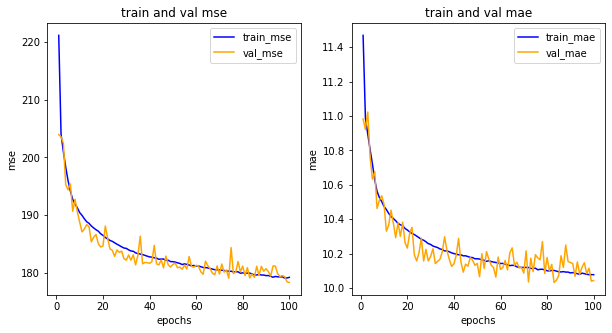

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

5501/5501 [==============================] - 8s 2ms/step - loss: 178.6804 - mae: 10.0423 - mse: 178.6804


[178.68040466308594, 10.042258262634277, 178.68040466308594]

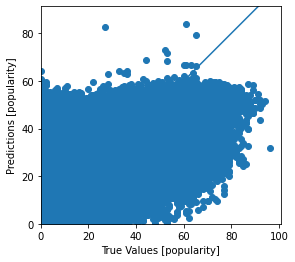

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions [popularity]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])